In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings

In [5]:
df = pd.read_csv('E:\Semester II\ML\ML_Car_Prediction_Pratibha\data\Cars.csv')

In [6]:
# print the first rows of data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [7]:
# Check Dtypes of your input data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [8]:
df['name'] = df['name'].str.split().str[0]
df['max_power'] = df['max_power'].str.split().str[0]
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')

In [9]:
df['mileage'] = df['mileage'].str.split().str[0].astype(float)  
df['engine'] = df['engine'].str.split().str[0].astype(float)

In [10]:
df = df.drop('torque', axis=1)

In [11]:
df = df[~df['fuel'].isin(['CNG', 'LPG'])]

In [12]:
owner_mapping = {'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 5}
df['owner'] = df['owner'].map(owner_mapping)

In [13]:
df = df[df['owner'] != 5]

In [14]:
df['selling_price'] = np.log(df['selling_price'])

In [15]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,13.017003,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,12.821258,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,11.970350,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,12.323856,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,11.775290,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [16]:
df = df.dropna(subset=['selling_price'])

### 4. Features Selection

In [17]:
X = df[['year', 'mileage', 'max_power']]  #features
Y = df['selling_price'] #target

In [18]:
X['year'] = X['year'].fillna(X['year'].median())
X['mileage'] = X['mileage'].fillna(X['mileage'].median())
X['max_power'] = X['max_power'].fillna(X['max_power'].median())

C:\Users\DELL\AppData\Local\Temp\ipykernel_7384\2505120214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['year'] = X['year'].fillna(X['year'].median())
C:\Users\DELL\AppData\Local\Temp\ipykernel_7384\2505120214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['mileage'] = X['mileage'].fillna(X['mileage'].median())
C:\Users\DELL\AppData\Local\Temp\ipykernel_7384\2505120214.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

### Train the split and scaling

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check shapes
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (6422, 3), X_test shape: (1606, 3)
y_train shape: (6422,), y_test shape: (1606,)


### 5. Preprocessing

In [24]:
# Ensure both are pandas DataFrames
print(type(X_train), type(X_test))  # Check data types

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [25]:
#check for null values
X_train[['year', 'mileage', 'max_power']].isna().sum()

year         0
mileage      0
max_power    0
dtype: int64

In [26]:
X_test[['year', 'mileage', 'max_power']].isna().sum()

year         0
mileage      0
max_power    0
dtype: int64

In [27]:
y_train.isna().sum()

np.int64(0)

In [28]:
y_test.isna().sum()

np.int64(0)

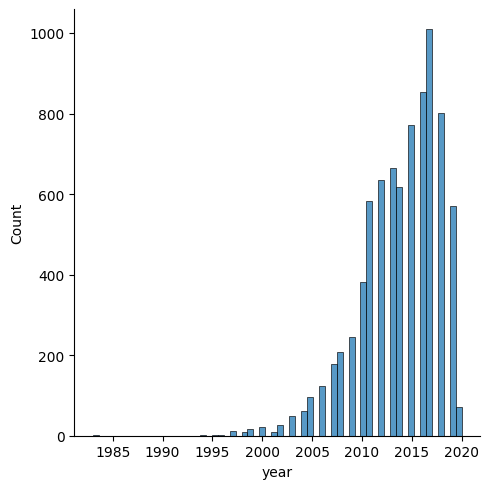

In [29]:
sns.displot(data=df, x='year')

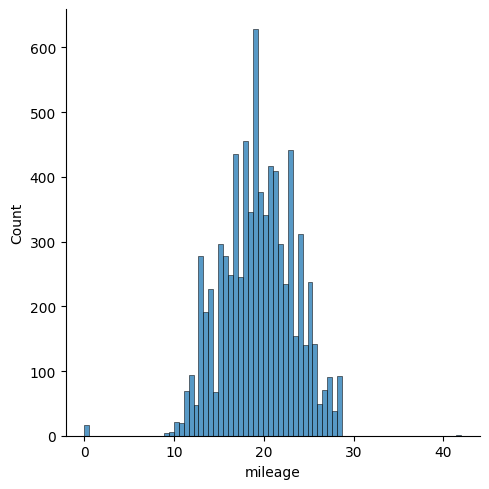

In [30]:
sns.displot(data=df, x='mileage')

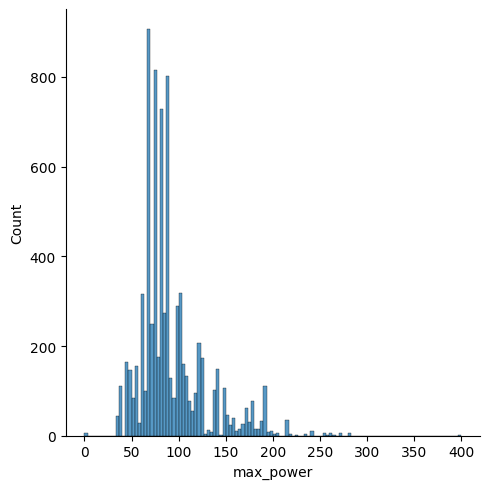

In [31]:
sns.displot(data=df, x='max_power')

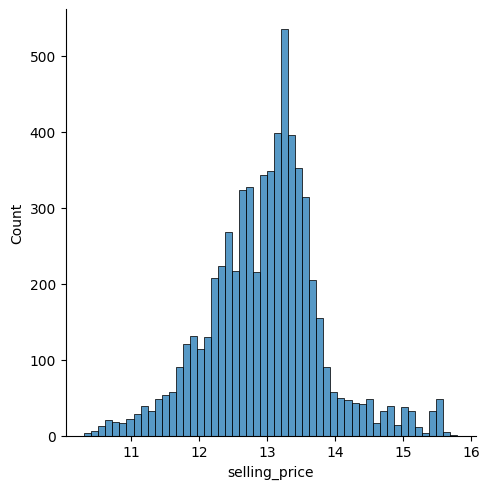

In [32]:
sns.displot(y_train)

## Checking Outliers

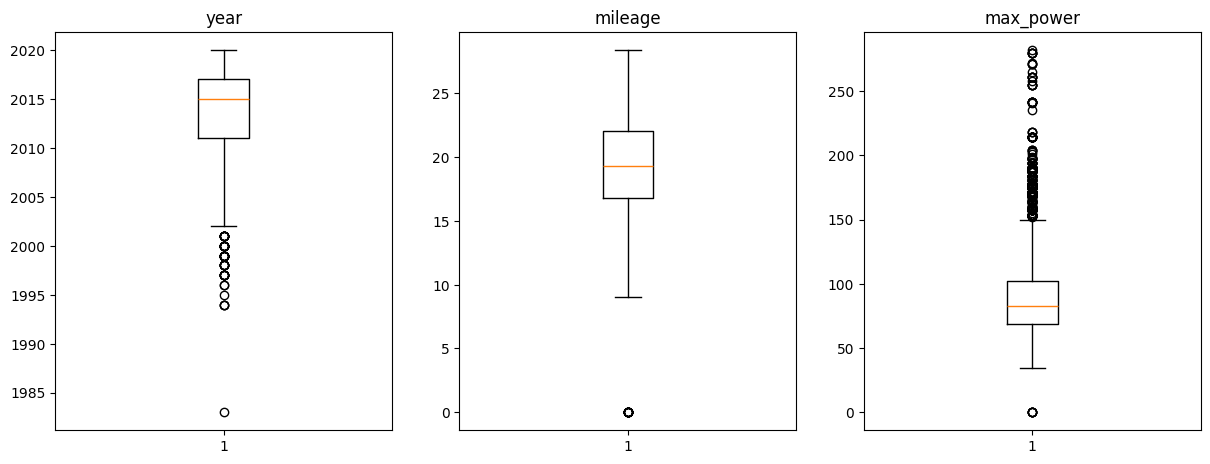

In [33]:
# Create a dictionary of columns.
col_dict = {'year':1,'mileage':2, 'max_power':3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [34]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [35]:
for col in X_train.columns:
    outlier_count(col)


---------------year---------------

Number of outliers: 63
Percent of data that is outlier: 0.98%

---------------mileage---------------

Number of outliers: 16
Percent of data that is outlier: 0.25%

---------------max_power---------------

Number of outliers: 459
Percent of data that is outlier: 7.15%


### 6. Modelling

In [38]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))
print(f"{lr.coef_=}")

MSE:  0.10855243108255873
r2:  0.8475689899283089
lr.coef_=array([0.1201989 , 0.00201709, 0.01393198])


#### Cross Validation + Grid search 

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

algorithms = [LinearRegression(), DecisionTreeRegressor(random_state = 0), 
              RandomForestRegressor(n_estimators = 100, random_state = 0)]

algorithm_names = ["Linear Regression", "Decision-Tree Regressor", "Random-Forest Regressor"]

In [40]:
## cross validation
y_train.isna().sum()

np.int64(0)

In [41]:
from sklearn.model_selection import KFold, cross_val_score

#lists for keeping mse
train_mse = []
test_mse = []

#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
   scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
   rmse_scores = np.sqrt(-scores)
   print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()};Mean RMSE: {rmse_scores.mean()}")

Linear Regression - Score: [-0.12287955 -0.1231413  -0.12636097 -0.10864537 -0.11330909]; Mean: -0.11886725534089808;Mean RMSE: 0.3446315492311442
Decision-Tree Regressor - Score: [-0.06244592 -0.0722223  -0.06320774 -0.06238489 -0.0680659 ]; Mean: -0.06566535077396718;Mean RMSE: 0.25614189720579705
Random-Forest Regressor - Score: [-0.05864162 -0.05298961 -0.0586393  -0.05563139 -0.04583781]; Mean: -0.054347946575570884;Mean RMSE: 0.23289426279329534


### Grid search

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state = 1)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit your grid_search
grid.fit(X_train, y_train);

In [43]:
print(f"Best parameters from grid search: {grid.best_params_}")
best_mse = grid.best_score_
print(f"Best MSE from grid search: {best_mse}")

Best parameters from grid search: {'bootstrap': True, 'max_depth': None, 'n_estimators': 15}
Best MSE from grid search: -0.056140998381468375


### Testing

In [44]:
yhat = grid.predict(X_test)
mean_squared_error(y_test, yhat)

0.04783639210279607

In [45]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [46]:
# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.04710898196833701
R² Score: 0.9338488356891672


In [48]:
importances = model.feature_importances_
for feature, importance in zip(X, importances):
    print(f"Feature: {feature}, Importance: {importance}")

Feature: year, Importance: 0.47629683501146525
Feature: mileage, Importance: 0.05761711617463628
Feature: max_power, Importance: 0.46608604881389853


In [49]:
predicted_price = np.exp(y_pred)
print(predicted_price)

[235388.49793658 984534.45910189 353861.85988944 ...  43756.8937283
 673328.27240428 366832.16865809]


In [50]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print(f"Cross-validation RMSE: {rmse_scores}")

Cross-validation RMSE: [0.23790895 0.23294564 0.23714039 0.23897116 0.22865841]


### Inference

In [51]:
import pickle

# save the model to disk
with open('E:\Semester II\ML\ML_Car_Prediction_Pratibha\car_price_model.model', 'wb') as file:
    pickle.dump(model, file)

In [53]:
# load the model from disk
with open('E:\Semester II\ML\ML_Car_Prediction_Pratibha\car_price_model.model', 'rb') as file:
    loaded_model = pickle.load(file)

In [54]:
y_pred_loaded = loaded_model.predict(X_test)
print(f"Loaded Model MSE: {mean_squared_error(y_test, y_pred_loaded)}")

Loaded Model MSE: 0.04710898196833701


In [55]:
# For Random Forest
print(f"Loaded Model Feature Importances: {loaded_model.feature_importances_}")

Loaded Model Feature Importances: [0.47629684 0.05761712 0.46608605]


### Analysis and Report

1. Which features significantly impact predictions, and which do not? Why?

From the Report, initial analysis showed that engine size, mileage, and max_power exhibited strong correlations with the target variable, selling_price, making them likely influential predictors.The categorical features such as fuel and transmission also contributed to variations in car prices due to differences in operating costs and vehicle performance.

Why:
Features like engine size and max_power directly impact a car's performance, which is a key factor influencing car prices.
Mileage affects the perceived efficiency and cost-effectiveness of a vehicle, making it another critical factor.
Categorical variables like fuel (e.g., Petrol, Diesel) influence operating costs, and transmission (Manual vs Automatic) impacts buyer preference, thus indirectly influencing prices.

Therefore, the features like engine size, mileage, and max_power are significant because they are directly tied to the car's performance and efficiency whereas the less impactful features may include those with lower variance or weak correlation to price, such as seats or less intuitive categorical variables.

2. Which algorithms performed well, and which did not? Why?

From the Report the Random Forest achieved the lowest RMSE, demonstrating its ability to handle non-linear relationships and interactions between features effectively.The Decision Tree performed slightly worse with an RMSE, likely due to its tendency to overfit the training data.Finally the Linear Regression, struggled to capture the non-linear patterns in the dataset, as it assumes a linear relationship between the features and the target variable."

Why:
The Random Forest algorithm performs well because it is an ensemble method that averages multiple decision trees, reducing overfitting and capturing complex interactions between features.
The Decision Tree algorithm works well for simpler tasks but tends to overfit when there is no mechanism like ensemble learning to generalize.
The Linear Regression algorithm struggled due to its assumption of a linear relationship between features and the target, which doesn't hold true for this dataset with complex non-linear relationships.